# Linear Regression

Inputs

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Generate noisy data $0.1 t+2*t^2 - 0.5t^5+\mathrm{noise}$ from $m$ random samples $t$.

In [2]:
def generate(m,plot=True):
    t = np.sort(np.random.uniform(0,2,m))
    sig = 0.1*t+ 2*t**2 - 0.5*t**5
    shp = np.shape(sig)
    noise = 3*np.random.normal(np.zeros(shp))

    signoise = sig+noise

    if plot:
        plt.plot(t,signoise,'b',t,sig,'r')
        plt.show()
    return t,signoise,sig
    



Try with $50$ points:

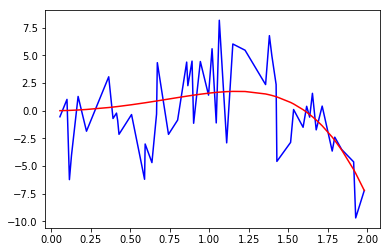

In [3]:
t, signoise, sig = generate(50)

A Function Implementing Least Squares Fit with general Basis Functions

In [4]:
# least squares regression 
def LeastSquares(Basisfunct , t , signal, test =t , plot = 1):
    A = Basisfunct(t)
    AA = Basisfunct(test)
    n = np.shape(A)[0]
    G = np.zeros((n,n))
    b = np.zeros(n)
    for i in range(n):
        b[i]=np.sum(np.multiply(A[i],signal))
        for j in range(n):
            G[i,j]=np.sum(np.multiply(A[i],A[j]))
    params = np.linalg.solve(G,b)
    fit = np.zeros(np.shape(test))
    for i in range(n):
        fit = fit + params[i]*AA[i]
    exactsig = 0.1*test+ 2*test**2 - 0.5*test**5
    err = 1/np.sqrt(len(test))*np.linalg.norm(exactsig-fit)
    if plot == 1:
        plt.plot(t,signal,'b',test,fit,'g',test,exactsig,'r')
        plt.show()
    return  err, params , fit

Apply to our noisy samples

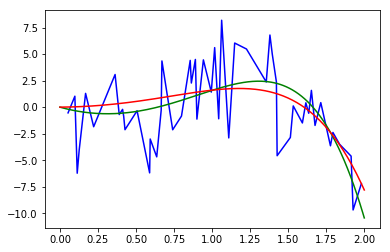

0.8053795984614789


In [5]:
test = np.linspace(0,2,200)
err, params, fit = LeastSquares(lambda x: [x,x**2,x**5], t , signoise, test)
print(err)

What if we do not know the right Ansatz? Try general Polynomials:

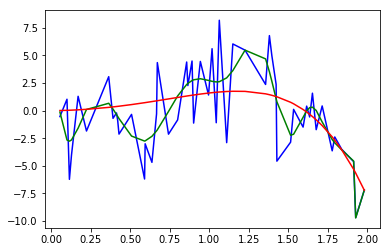

In [15]:
#general code for fitting polynomials of degree n
n = 50
err, params, fit = LeastSquares(lambda x: [x**i for i in range(n)], t , signoise)

Observation: If $n$ is small then we have underfitting, else we have overfitting.

A general Function that experiments with different $m,n$:

In [13]:
def experiment(m,n,k = 100, plot = True):
    t, signoise, sig = generate(m,False)
    test = np.linspace(0,2,k)
    err, params, fit = LeastSquares(lambda x: [x**i for i in range(n)], t , signoise, test, plot)
    return err
    

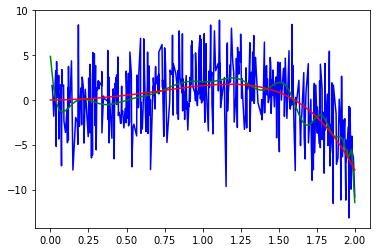

0.9303308352311405

In [16]:
experiment(500,50)